In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd




# 데이터 로드 (단어 10,000개 사용)

## 1. 데이터 확인

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


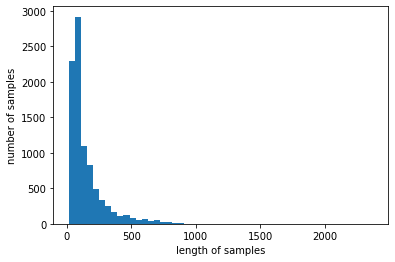

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

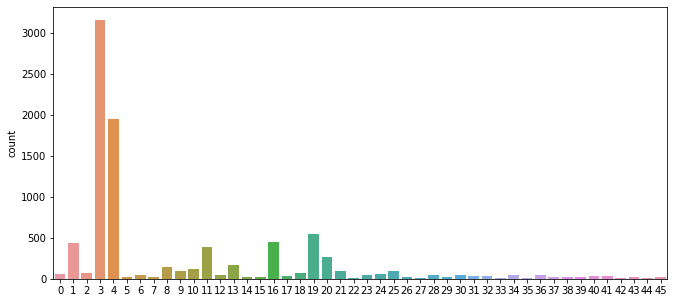

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 2. 데이터 복원

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [11]:
index_to_word = { index+3 : word for word, index in word_index.items() }


In [12]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [13]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [14]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [15]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [16]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [17]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

## 3. 벡터화

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [19]:
#DTM
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [20]:
#TF-IDF
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)


(8982, 9670)


## 4. 분류모델

### (1) 나이브 베이즈 분류기

In [21]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산


In [22]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [23]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [25]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

In [26]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')


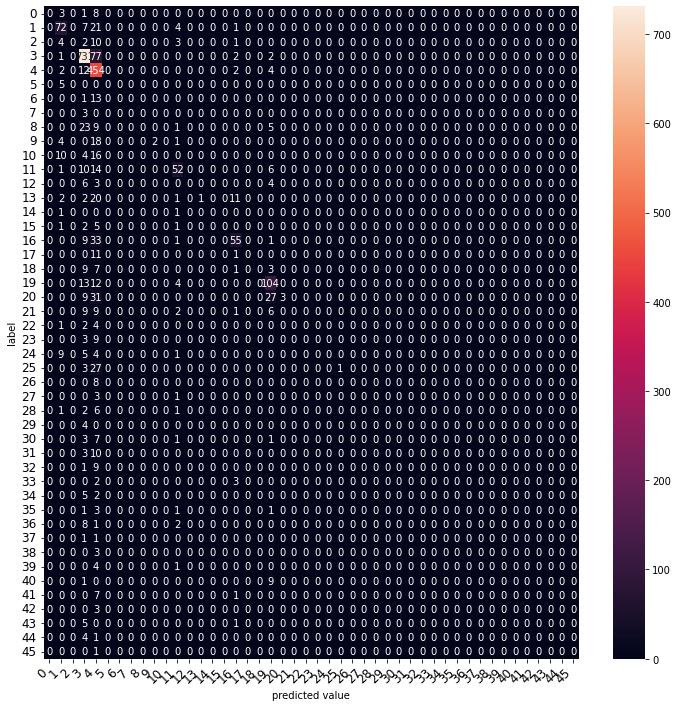

In [27]:
graph_confusion_matrix(model, tfidfv_test, y_test)

### (2) 컴플리먼트 나이브 베이즈 분류기

In [28]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [29]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [30]:
print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.88      0.74       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.75      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.73      0.63        83
          12       0.00      0.00      0.00        13
          13       0.58      0.59      0.59        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.79      0.73        99
          17       0.00    

### (3). 로지스틱회귀

In [31]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000)

In [32]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8076580587711487


In [33]:
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.78      0.76       105
           2       0.74      0.85      0.79        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.59      0.59      0.59        37
          14       0.50      0.50      0.50         2
          15       0.67      0.44      0.53         9
          16       0.68      0.75      0.71        99
          17       0.75    

### (4). 서포트 벡터 머신

In [34]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=5000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=5000, penalty='l1')

In [35]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.784060552092609


In [36]:
print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.72      0.73      0.73       105
           2       0.72      0.65      0.68        20
           3       0.91      0.92      0.91       813
           4       0.81      0.84      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       0.67      0.67      0.67         3
           8       0.59      0.68      0.63        38
           9       0.78      0.84      0.81        25
          10       0.85      0.77      0.81        30
          11       0.63      0.72      0.67        83
          12       0.36      0.38      0.37        13
          13       0.61      0.54      0.57        37
          14       1.00      1.00      1.00         2
          15       0.50      0.44      0.47         9
          16       0.69      0.73      0.71        99
          17       0.78    

### (5). DecisionTree

In [37]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [38]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [39]:
print(classification_report(y_test, tree.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.42      0.53       105
           2       0.62      0.50      0.56        20
           3       0.93      0.83      0.88       813
           4       0.40      0.90      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.85      0.77      0.81        30
          11       0.64      0.51      0.56        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.84      0.69        99
          17       0.00    

### (6). RandomForest

In [40]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [41]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


In [42]:
print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

### (7). GradientBoosting

In [43]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [44]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


In [45]:
print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.68      0.72       105
           2       0.78      0.70      0.74        20
           3       0.88      0.91      0.89       813
           4       0.76      0.83      0.79       474
           5       0.50      0.20      0.29         5
           6       0.80      0.86      0.83        14
           7       1.00      0.33      0.50         3
           8       0.64      0.66      0.65        38
           9       0.74      0.80      0.77        25
          10       0.90      0.87      0.88        30
          11       0.62      0.64      0.63        83
          12       0.33      0.46      0.39        13
          13       0.62      0.49      0.55        37
          14       0.14      0.50      0.22         2
          15       0.38      0.33      0.35         9
          16       0.73      0.73      0.73        99
          17       0.27    

### (8).Voting

In [46]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [47]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8116651825467498


In [48]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.77      0.74      0.76       105
           2       0.73      0.80      0.76        20
           3       0.92      0.94      0.93       813
           4       0.83      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.70      0.68      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.65      0.69      0.67        83
          12       0.46      0.46      0.46        13
          13       0.68      0.62      0.65        37
          14       0.14      0.50      0.22         2
          15       0.57      0.44      0.50         9
          16       0.72      0.75      0.73        99
          17       0.53    

**단어수 10,000개의 분류모델에서는 보팅 모델의 f1-score 값이 0.81로 가장 높게 나왔다.  이번에는 단어수를 5,000개로 조정하여 분류모델의 성능을 확인해보자.**

# 데이터 로드 (단어 5,000개 사용)

## 1. 데이터 확인

In [49]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [50]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [51]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [52]:
print(y_train[0])
print(y_test[0])

3
3


In [53]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


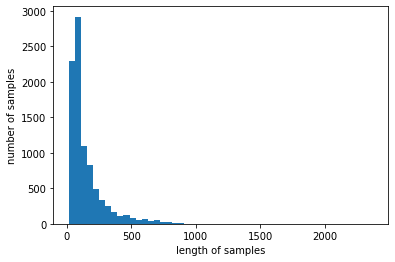

In [54]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

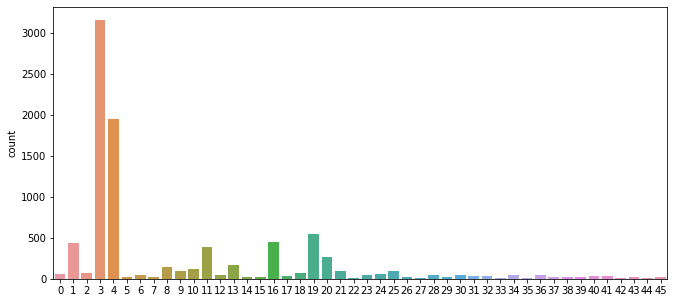

In [55]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [56]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 2. 데이터 복원

In [57]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [58]:
index_to_word = { index+3 : word for word, index in word_index.items() }


In [59]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token


In [60]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [61]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [62]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [63]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [64]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

## 3. 벡터화

In [65]:
#DTM
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [66]:
#TF-IDF
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)


(8982, 4867)


## 4. 분류모델

### (1) 나이브 베이즈 분류기

In [67]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [68]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


In [69]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

## (2) 컴플리먼트 나이브 베이즈 분류기

In [70]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [71]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [72]:
print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
          17       0.00    

## (3) 로지스틱회귀

In [73]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000)

In [74]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8058771148708815


In [75]:
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.80      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.74      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.73      0.70        99
          17       0.82    

## (4) 서포트 벡터 머신

In [76]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=5000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=5000, penalty='l1')

In [77]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


In [78]:
print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.70      0.70      0.70       105
           2       0.78      0.70      0.74        20
           3       0.88      0.90      0.89       813
           4       0.79      0.81      0.80       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       0.50      0.33      0.40         3
           8       0.62      0.63      0.62        38
           9       0.78      0.84      0.81        25
          10       0.88      0.77      0.82        30
          11       0.64      0.70      0.67        83
          12       0.50      0.38      0.43        13
          13       0.56      0.62      0.59        37
          14       0.50      1.00      0.67         2
          15       0.50      0.33      0.40         9
          16       0.64      0.69      0.66        99
          17       0.78    

### (5) Decision Tree

In [79]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [80]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


In [81]:
print(classification_report(y_test, tree.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.69        99
          17       0.00    

## (6). RandomForest

In [82]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [83]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.701246660730187


In [84]:
print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

### (7) GradientBoosting

In [85]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [86]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


In [87]:
print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16       0.72      0.77      0.75        99
          17       0.33    

### (8) Voting

In [88]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [89]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8161175422974176


In [90]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17       0.57    

**성능 평과 결과, f1-score 기준으로 voting모델이 가장 좋은 점수가 나왔다. 또한 5,000개의 단어를 사용했을때가 10,000개의 단어를 사용했을때보다, SVC와 decision tree를 제외한 모든 분류 모델에서 성능이 좋은것으로 측정되었다. 이번에는 딥러닝 모델을 사용하여 분류를 진행해보자.**

## 딥러닝 모델 사용

In [113]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [126]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
max_len=145
X_train = pad_sequences(x_train, maxlen=max_len)
X_test = pad_sequences(x_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [127]:
X_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [  0,   0,   0, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [  0,   0,   0, ..., 364,  17,  12],
       [  0,   0,   0, ..., 113,  17,  12]], dtype=int32)

In [132]:
import tensorflow as tf
#LSTM 레이어 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 5000 #사용할 단어사전 크기
embedding_dim = 128 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) #hidden 노드 128개
model.add(tf.keras.layers.Dense(46, activation='softmax')) 



model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 46)                5934      
Total params: 777,518
Trainable params: 777,518
Non-trainable params: 0
_________________________________________________________________


In [139]:
# 모델 학습
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
epochs=100  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)  
mc = ModelCheckpoint('best', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, 
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=(es,mc),
                    validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 31s 2s/step - loss: 2.4192 - accuracy: 0.3534 - val_loss: 2.4185 - val_accuracy: 0.3450

Epoch 00001: val_loss improved from inf to 2.41845, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 2/100
15/15 [==============================] - 29s 2s/step - loss: 2.4104 - accuracy: 0.3534 - val_loss: 2.4055 - val_accuracy: 0.3450

Epoch 00002: val_loss improved from 2.41845 to 2.40552, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 3/100
15/15 [==============================] - 29s 2s/step - loss: 2.4108 - accuracy: 0.3534 - val_loss: 2.4060 - val_accuracy: 0.3450

Epoch 00003: val_loss did not improve from 2.40552
Epoch 4/100
15/15 [==============================] - 29s 2s/step - loss: 2.4093 - accuracy: 0.3534 - val_loss: 2.4043 - val_accuracy: 0.3450

Epoch 00004: val_loss improved from 2.40552 to 2.40432, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 5/100
15/15 [==============================] - 29s 2s/step - loss: 2.4090 - accuracy: 0.3534 - val_loss: 2.4052 - val_accuracy: 0.3450

Epoch 00005: val_loss did not improve from 2.40432
Epoch 6/100
15/15 [==============================] - 29s 2s/step - loss: 2.4062 - accuracy: 0.3534 - val_loss: 2.4067 - val_accuracy: 0.3450

Epoch 00006: val_loss did not improve from 2.40432
Epoch 7/100
15/15 [==============================] - 29s 2s/step - loss: 2.3978 - accuracy: 0.3534 - val_loss: 2.3724 - val_accuracy: 0.3450

Epoch 00007: val_loss improved from 2.40432 to 2.37235, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 8/100
15/15 [==============================] - 28s 2s/step - loss: 2.3486 - accuracy: 0.3534 - val_loss: 2.3204 - val_accuracy: 0.3450

Epoch 00008: val_loss improved from 2.37235 to 2.32045, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 9/100
15/15 [==============================] - 28s 2s/step - loss: 2.2763 - accuracy: 0.4054 - val_loss: 2.2127 - val_accuracy: 0.4964

Epoch 00009: val_loss improved from 2.32045 to 2.21273, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 10/100
15/15 [==============================] - 28s 2s/step - loss: 2.1499 - accuracy: 0.5022 - val_loss: 2.0898 - val_accuracy: 0.5081

Epoch 00010: val_loss improved from 2.21273 to 2.08982, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 11/100
15/15 [==============================] - 28s 2s/step - loss: 2.3816 - accuracy: 0.4333 - val_loss: 2.0455 - val_accuracy: 0.5070

Epoch 00011: val_loss improved from 2.08982 to 2.04551, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 12/100
15/15 [==============================] - 29s 2s/step - loss: 2.0332 - accuracy: 0.5070 - val_loss: 2.0305 - val_accuracy: 0.5153

Epoch 00012: val_loss improved from 2.04551 to 2.03050, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 13/100
15/15 [==============================] - 29s 2s/step - loss: 2.0444 - accuracy: 0.5129 - val_loss: 2.0102 - val_accuracy: 0.5081

Epoch 00013: val_loss improved from 2.03050 to 2.01016, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 14/100
15/15 [==============================] - 29s 2s/step - loss: 1.9766 - accuracy: 0.5218 - val_loss: 1.9803 - val_accuracy: 0.5109

Epoch 00014: val_loss improved from 2.01016 to 1.98032, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 15/100
15/15 [==============================] - 29s 2s/step - loss: 1.9389 - accuracy: 0.5258 - val_loss: 1.9681 - val_accuracy: 0.5159

Epoch 00015: val_loss improved from 1.98032 to 1.96806, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 16/100
15/15 [==============================] - 28s 2s/step - loss: 1.9074 - accuracy: 0.5299 - val_loss: 1.9796 - val_accuracy: 0.5170

Epoch 00016: val_loss did not improve from 1.96806
Epoch 17/100
15/15 [==============================] - 29s 2s/step - loss: 1.9153 - accuracy: 0.5304 - val_loss: 1.9498 - val_accuracy: 0.5181

Epoch 00017: val_loss improved from 1.96806 to 1.94984, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 18/100
15/15 [==============================] - 29s 2s/step - loss: 1.8820 - accuracy: 0.5333 - val_loss: 1.9125 - val_accuracy: 0.5225

Epoch 00018: val_loss improved from 1.94984 to 1.91248, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 19/100
15/15 [==============================] - 28s 2s/step - loss: 1.8531 - accuracy: 0.5378 - val_loss: 1.9580 - val_accuracy: 0.5209

Epoch 00019: val_loss did not improve from 1.91248
Epoch 20/100
15/15 [==============================] - 28s 2s/step - loss: 1.8610 - accuracy: 0.5343 - val_loss: 1.9047 - val_accuracy: 0.5225

Epoch 00020: val_loss improved from 1.91248 to 1.90471, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 21/100
15/15 [==============================] - 29s 2s/step - loss: 1.8278 - accuracy: 0.5388 - val_loss: 1.9051 - val_accuracy: 0.5220

Epoch 00021: val_loss did not improve from 1.90471
Epoch 22/100
15/15 [==============================] - 28s 2s/step - loss: 1.8050 - accuracy: 0.5564 - val_loss: 1.8675 - val_accuracy: 0.5337

Epoch 00022: val_loss improved from 1.90471 to 1.86749, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 23/100
15/15 [==============================] - 28s 2s/step - loss: 1.7597 - accuracy: 0.5635 - val_loss: 1.9763 - val_accuracy: 0.5398

Epoch 00023: val_loss did not improve from 1.86749
Epoch 24/100
15/15 [==============================] - 28s 2s/step - loss: 1.7576 - accuracy: 0.5733 - val_loss: 1.8924 - val_accuracy: 0.5292

Epoch 00024: val_loss did not improve from 1.86749
Epoch 25/100
15/15 [==============================] - 29s 2s/step - loss: 1.7127 - accuracy: 0.5809 - val_loss: 1.8307 - val_accuracy: 0.5554

Epoch 00025: val_loss improved from 1.86749 to 1.83067, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 26/100
15/15 [==============================] - 28s 2s/step - loss: 1.6795 - accuracy: 0.5872 - val_loss: 1.7884 - val_accuracy: 0.5582

Epoch 00026: val_loss improved from 1.83067 to 1.78843, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 27/100
15/15 [==============================] - 28s 2s/step - loss: 1.6477 - accuracy: 0.5851 - val_loss: 1.7573 - val_accuracy: 0.5504

Epoch 00027: val_loss improved from 1.78843 to 1.75727, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 28/100
15/15 [==============================] - 28s 2s/step - loss: 1.5957 - accuracy: 0.5812 - val_loss: 1.7248 - val_accuracy: 0.5654

Epoch 00028: val_loss improved from 1.75727 to 1.72482, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 29/100
15/15 [==============================] - 29s 2s/step - loss: 1.5545 - accuracy: 0.5912 - val_loss: 1.7638 - val_accuracy: 0.5459

Epoch 00029: val_loss did not improve from 1.72482
Epoch 30/100
15/15 [==============================] - 29s 2s/step - loss: 1.5642 - accuracy: 0.6086 - val_loss: 1.6651 - val_accuracy: 0.6021

Epoch 00030: val_loss improved from 1.72482 to 1.66515, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 31/100
15/15 [==============================] - 28s 2s/step - loss: 1.4932 - accuracy: 0.6269 - val_loss: 1.6542 - val_accuracy: 0.5910

Epoch 00031: val_loss improved from 1.66515 to 1.65424, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 32/100
15/15 [==============================] - 29s 2s/step - loss: 1.4332 - accuracy: 0.6408 - val_loss: 1.6018 - val_accuracy: 0.6027

Epoch 00032: val_loss improved from 1.65424 to 1.60179, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 33/100
15/15 [==============================] - 28s 2s/step - loss: 1.4129 - accuracy: 0.6401 - val_loss: 1.6185 - val_accuracy: 0.6027

Epoch 00033: val_loss did not improve from 1.60179
Epoch 34/100
15/15 [==============================] - 29s 2s/step - loss: 1.3859 - accuracy: 0.6494 - val_loss: 1.6182 - val_accuracy: 0.6055

Epoch 00034: val_loss did not improve from 1.60179
Epoch 35/100
15/15 [==============================] - 29s 2s/step - loss: 1.3518 - accuracy: 0.6536 - val_loss: 1.5841 - val_accuracy: 0.6127

Epoch 00035: val_loss improved from 1.60179 to 1.58407, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 36/100
15/15 [==============================] - 28s 2s/step - loss: 1.3274 - accuracy: 0.6522 - val_loss: 1.5829 - val_accuracy: 0.6138

Epoch 00036: val_loss improved from 1.58407 to 1.58285, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 37/100
15/15 [==============================] - 28s 2s/step - loss: 1.3188 - accuracy: 0.6630 - val_loss: 1.6111 - val_accuracy: 0.6032

Epoch 00037: val_loss did not improve from 1.58285
Epoch 38/100
15/15 [==============================] - 29s 2s/step - loss: 1.3240 - accuracy: 0.6543 - val_loss: 1.6249 - val_accuracy: 0.5971

Epoch 00038: val_loss did not improve from 1.58285
Epoch 39/100
15/15 [==============================] - 29s 2s/step - loss: 1.3147 - accuracy: 0.6621 - val_loss: 1.5714 - val_accuracy: 0.6138

Epoch 00039: val_loss improved from 1.58285 to 1.57144, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 40/100
15/15 [==============================] - 29s 2s/step - loss: 1.2722 - accuracy: 0.6692 - val_loss: 1.5939 - val_accuracy: 0.6093

Epoch 00040: val_loss did not improve from 1.57144
Epoch 41/100
15/15 [==============================] - 28s 2s/step - loss: 1.2606 - accuracy: 0.6686 - val_loss: 1.5728 - val_accuracy: 0.6138

Epoch 00041: val_loss did not improve from 1.57144
Epoch 42/100
15/15 [==============================] - 28s 2s/step - loss: 1.2331 - accuracy: 0.6806 - val_loss: 1.5713 - val_accuracy: 0.6166

Epoch 00042: val_loss improved from 1.57144 to 1.57132, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 43/100
15/15 [==============================] - 29s 2s/step - loss: 1.2091 - accuracy: 0.6919 - val_loss: 1.5577 - val_accuracy: 0.6127

Epoch 00043: val_loss improved from 1.57132 to 1.55770, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 44/100
15/15 [==============================] - 29s 2s/step - loss: 1.2152 - accuracy: 0.6855 - val_loss: 1.5673 - val_accuracy: 0.6127

Epoch 00044: val_loss did not improve from 1.55770
Epoch 45/100
15/15 [==============================] - 29s 2s/step - loss: 1.1962 - accuracy: 0.6909 - val_loss: 1.5590 - val_accuracy: 0.6060

Epoch 00045: val_loss did not improve from 1.55770
Epoch 46/100
15/15 [==============================] - 28s 2s/step - loss: 1.1732 - accuracy: 0.7048 - val_loss: 1.5660 - val_accuracy: 0.6255

Epoch 00046: val_loss did not improve from 1.55770
Epoch 47/100
15/15 [==============================] - 29s 2s/step - loss: 1.1776 - accuracy: 0.7016 - val_loss: 1.5750 - val_accuracy: 0.6166

Epoch 00047: val_loss did not improve from 1.55770
Epoch 48/100
15/15 [==============================] - 29s 2s/step - loss: 1.1393 - accuracy: 0.7083 - val_loss: 1.5520 - val_accuracy: 0.6144

Epoch 00048: val_loss improved from 1.55770 to 1.55197, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 49/100
15/15 [==============================] - 28s 2s/step - loss: 1.1415 - accuracy: 0.7052 - val_loss: 1.6474 - val_accuracy: 0.6043

Epoch 00049: val_loss did not improve from 1.55197
Epoch 50/100
15/15 [==============================] - 29s 2s/step - loss: 1.1500 - accuracy: 0.7105 - val_loss: 1.6058 - val_accuracy: 0.6260

Epoch 00050: val_loss did not improve from 1.55197
Epoch 51/100
15/15 [==============================] - 28s 2s/step - loss: 1.1113 - accuracy: 0.7262 - val_loss: 1.5839 - val_accuracy: 0.6166

Epoch 00051: val_loss did not improve from 1.55197
Epoch 52/100
15/15 [==============================] - 28s 2s/step - loss: 1.0856 - accuracy: 0.7208 - val_loss: 1.5507 - val_accuracy: 0.6355

Epoch 00052: val_loss improved from 1.55197 to 1.55070, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 53/100
15/15 [==============================] - 28s 2s/step - loss: 1.0542 - accuracy: 0.7429 - val_loss: 1.5335 - val_accuracy: 0.6294

Epoch 00053: val_loss improved from 1.55070 to 1.53346, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


Epoch 54/100
15/15 [==============================] - 28s 2s/step - loss: 1.0279 - accuracy: 0.7475 - val_loss: 1.6230 - val_accuracy: 0.6322

Epoch 00054: val_loss did not improve from 1.53346
Epoch 55/100
15/15 [==============================] - 28s 2s/step - loss: 1.0181 - accuracy: 0.7517 - val_loss: 1.5809 - val_accuracy: 0.6327

Epoch 00055: val_loss did not improve from 1.53346
Epoch 56/100
15/15 [==============================] - 29s 2s/step - loss: 0.9929 - accuracy: 0.7542 - val_loss: 1.5363 - val_accuracy: 0.6450

Epoch 00056: val_loss did not improve from 1.53346
Epoch 57/100
15/15 [==============================] - 29s 2s/step - loss: 0.9644 - accuracy: 0.7670 - val_loss: 1.5600 - val_accuracy: 0.6394

Epoch 00057: val_loss did not improve from 1.53346
Epoch 58/100
15/15 [==============================] - 29s 2s/step - loss: 0.9517 - accuracy: 0.7748 - val_loss: 1.5482 - val_accuracy: 0.6500

Epoch 00058: val_loss did not improve from 1.53346
Epoch 00058: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


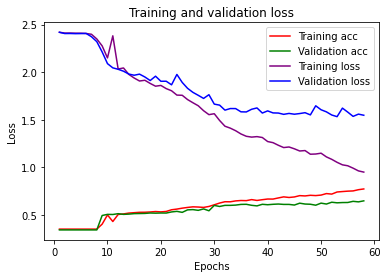

In [140]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [141]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

71/71 - 6s - loss: 1.6393 - accuracy: 0.6354
[1.6393300294876099, 0.6353517174720764]


## 회고

이번 노드에서는 뉴스 카테고리를 다양한 머신러닝 알고리즘과 딥러닝 모델을 통해 분류해보는 실습이 진행됐다.
이번 노드를 하면서 머신런이 알고리즘이 간단한 문제에서는 오히려 딥러닝 모델보다 시간적으로, 성능적으로 더욱 좋은 성능을 낼 수 있다는 점을 느꼈다.
또한 자연어처리 노드가 매번 전처리 과정이 조금씩 달라서 스스로 공부할때 매우 헷갈렸었는데, 전에 했던 노드들을 다시 참고하면서 공부해보니 이제 좀 정리가 되는 기분이다. 